In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*
import seaborn as sns


bd = pd.read_csv("C:/Users/Miguel Luna/Desktop/Tabla_limpia.csv")
bd.head()

bd.columns
bd = bd.drop(['Unnamed: 0'], axis=1)

In [2]:
from optbinning import OptimalBinning

# Regresión Logística con woe

Cargamos la base limpia de la Tarea 1, de donde nuestra varible de respuesta es 'Otorgación_credito'

In [3]:
X = bd
X
y = bd['Otorgación_credito']

Generamos los WOE's para cada una de las variables dependiendo de su característica (continuas o categróricas)

In [4]:
optb_comp_interno12 = OptimalBinning(name="comp_interno1", dtype="numerical", solver="cp")
optb_comp_interno22 = OptimalBinning(name="comp_interno2", dtype="categorical", solver="mip",)
optb_comp_interno32 = OptimalBinning(name="comp_interno3", dtype="numerical", solver="cp")
optb_comp_interno42 = OptimalBinning(name="comp_interno4", dtype="numerical", solver="cp")
optb_categoria12 = OptimalBinning(name="categoria1", dtype="categorical", solver="mip",)
optb_categoria22 = OptimalBinning(name="categoria2", dtype="categorical", solver="mip",)
optb_categoria32 = OptimalBinning(name="categoria3", dtype="categorical", solver="mip",)
optb_comp_mixto12 = OptimalBinning(name="comp_mixto1", dtype="numerical", solver="cp")
optb_comp_externo12 = OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp")
optb_comp_externo22 = OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp")
optb_comp_externo32 = OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp")
optb_comp_externo42 = OptimalBinning(name="comp_externo4", dtype="numerical", solver="cp")
optb_inversion2 = OptimalBinning(name="inversion", dtype="numerical", solver="cp")

In [5]:
optb_comp_interno12.fit(X["comp_interno1"].values, y)
optb_comp_interno22.fit(X["comp_interno2"].values, y)
optb_comp_interno32.fit(X["comp_interno3"].values, y)
optb_comp_interno42.fit(X["comp_interno4"].values, y)
optb_categoria12.fit(X["categoria1"].values, y)
optb_categoria22.fit(X["categoria2"].values, y)
optb_categoria32.fit(X["categoria3"].values, y)
optb_comp_mixto12.fit(X["comp_mixto1"].values, y)
optb_comp_externo12.fit(X["comp_externo1"].values, y)
optb_comp_externo22.fit(X["comp_externo2"].values, y)
optb_comp_externo32.fit(X["comp_externo3"].values, y)
optb_comp_externo42.fit(X["comp_externo4"].values, y)
optb_inversion2.fit(X["inversion"].values, y)

OptimalBinning(name='inversion')

In [6]:
X["woe_comp_interno1"] = optb_comp_interno12.transform(X["comp_interno1"], metric="woe")
X["woe_comp_interno2"] = optb_comp_interno22.transform(X["comp_interno2"], metric="woe")
X["woe_comp_interno3"] = optb_comp_interno32.transform(X["comp_interno3"], metric="woe")
X["woe_comp_interno4"] = optb_comp_interno42.transform(X["comp_interno4"], metric="woe")
X["woe_categoria1"] = optb_categoria12.transform(X["categoria1"], metric="woe")
X["woe_categoria2"] = optb_categoria22.transform(X["categoria2"], metric="woe")
X["woe_categoria3"] = optb_categoria32.transform(X["categoria3"], metric="woe")
X["woe_comp_mixto1"] = optb_comp_mixto12.transform(X["comp_mixto1"], metric="woe")
X["woe_comp_externo1"] = optb_comp_externo12.transform(X["comp_externo1"], metric="woe")
X["woe_comp_externo2"] = optb_comp_externo22.transform(X["comp_externo2"], metric="woe")
X["woe_comp_externo3"] = optb_comp_externo32.transform(X["comp_externo3"], metric="woe")
X["woe_comp_externo4"] = optb_comp_externo42.transform(X["comp_externo4"], metric="woe")
X["woe_inversion"] = optb_inversion2.transform(X["inversion"], metric="woe")

## División en muestra de entrenamiento y validación

Dividimos los table con WOEs en nuestras muestras de entrenamiento y validación (en un 30% del total de la muestra). Adicionalmente diferenciamos las variables de respuesta en entrenamiento y validación.  

In [7]:
X2 = X
train, test = train_test_split(X, test_size = 0.30, random_state = 100) 
test.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,_id2_,...,woe_comp_interno4,woe_categoria1,woe_categoria2,woe_categoria3,woe_comp_mixto1,woe_comp_externo1,woe_comp_externo2,woe_comp_externo3,woe_comp_externo4,woe_inversion
32670,1450,2016-01-06,0.000000,b'1',14.0,52.0,3.0,9.0,159.0,33350,...,0.019924,-0.09507,-0.076426,-0.141343,0.037586,0.240717,0.226333,-0.260368,-0.051541,-0.021435
14385,72725,2019-10-30,607.902736,b'1',15.0,46.0,3.0,8.0,160.0,1672675,...,0.039347,-0.09507,0.178782,0.182157,0.037586,0.240717,0.226333,-0.664415,-0.051541,-0.113624
16314,61464,2019-04-25,8105.369807,b'1',30.0,74.0,2.0,11.0,175.0,1413672,...,-0.309384,-0.11414,-0.027928,0.241287,0.043948,-0.637345,-0.668426,0.567187,-0.051541,0.063308
7694,32302,2017-08-03,1013.171226,b'1',30.0,75.0,1.0,9.0,175.0,742946,...,-0.309384,0.10505,-0.076426,0.241287,-0.204770,-0.160588,-0.230731,-0.496123,-0.051541,-0.021435
27591,67953,2019-08-26,0.000000,b'0',19.0,41.0,1.0,9.0,164.0,1562919,...,0.187390,0.10505,-0.076426,-0.203965,0.037586,0.374841,0.317147,-0.019936,-0.051541,-0.021435


In [8]:
X_woe_train=train.iloc[:,17:]
y_train=train.iloc[:,16]
X_woe_test=test.iloc[:,17:]
y_test = test.iloc[:,16]

## Modelo de regresión logística con todas las variables

Generamos un modelo de regresión logística con todas las variables explicativas

In [9]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

## Roc en entrenamiento y validación

Generamos las curvas ROC y obtenemos el área bajo la curva (AUC) para las muestras de entrenamiento  y validación 

In [10]:
y_pred=clf.predict(X_woe_test)
y_pred1=clf.decision_function(X_woe_test)

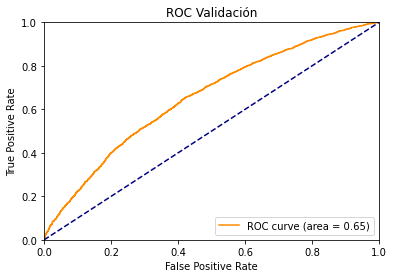

In [11]:
fpr,tpr,threshold = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Validación')
plt.legend(loc="lower right")
plt.show()

In [12]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)

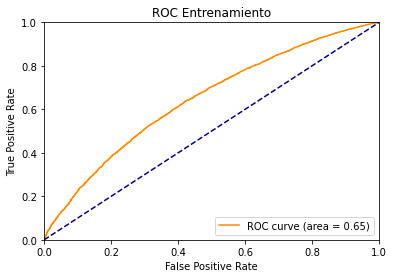

In [13]:
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Entrenamiento')
plt.legend(loc="lower right")
plt.show()

En lo que sigue vamos a generar la matriz de correlaciones y para tratar de mejorar el modelo vamos a seleccionar las variables sin una correlacción significativa. 

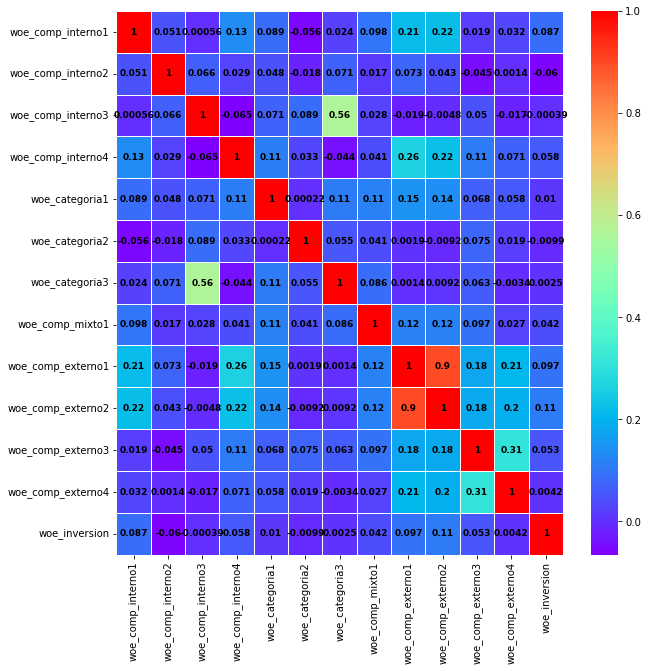

In [14]:
corr = train.iloc[:,17:].corr()
xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=90, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

Descartamos las variables 'woe_comp_interno3', 'woe_comp_externo1' y 'woe_comp_externo4' por sus niveles 'altos' de correlación

Nuevamente generamos la matriz de correlaciones. 

In [15]:
## Modelo sin las variables correlacionadas.
#f_train=X_woe_train.drop(['woe_comp_interno3','woe_comp_externo1'],axis=1)
#fX_woe_test=X_woe_test.drop(['woe_comp_interno3','woe_comp_externo1'],axis=1)
f_train=X_woe_train.drop(['woe_comp_interno3','woe_comp_externo1','woe_comp_externo4'],axis=1)
fX_woe_test=X_woe_test.drop(['woe_comp_interno3','woe_comp_externo1','woe_comp_externo4'],axis=1)

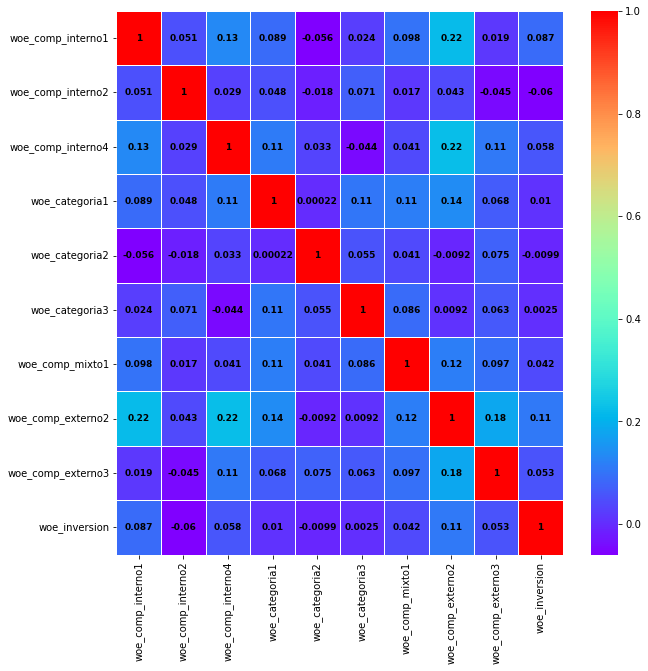

In [16]:
corr = f_train.corr()
xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=90, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

Nuevamente entrenamos un modelo de regresión logística sin las variables descartadas, obtenemos ROC y AUC como en el modelo anterior.

In [17]:
model=LogisticRegression(C=100, penalty='l2')
clf=model.fit(f_train,y_train)

In [18]:
y_pred=clf.predict(fX_woe_test)
y_pred1=clf.decision_function(fX_woe_test)

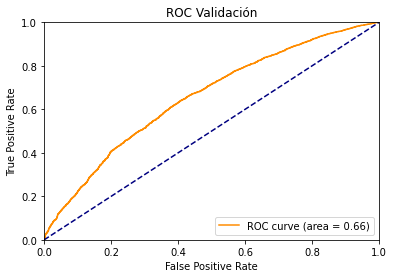

In [19]:
fpr,tpr,threshold = roc_curve(y_test, y_pred1)
roc_auc_test = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Validación')
plt.legend(loc="lower right")
plt.show()
## mejoró un poquito el ROC

In [20]:
y_pred=clf.predict(f_train)
y_pred1=clf.decision_function(f_train)

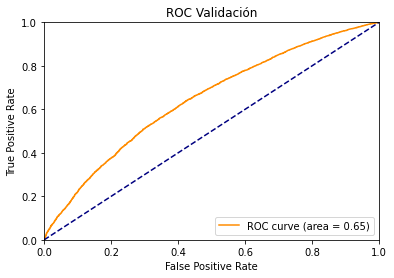

In [21]:
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc_train = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Validación')
plt.legend(loc="lower right")
plt.show()

En este nuevo modelo con las variables descartadas observamos una leve mejoría en el AUC.

### Gini

In [22]:
## Gini 
gini = roc_auc_test*2 -1
print('Gini: \n',gini)

Gini: 
 0.31099447907764866


### Validación cruzada

In [23]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [24]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [25]:
cross_val_score(model, X_woe_train, y_train, cv=k_fold)

array([0.78696278, 0.78753599, 0.78609626, 0.78691896, 0.78733032])

In [26]:
cross_validate(model, X_woe_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.05485392, 0.04794812, 0.0468626 , 0.04727054, 0.03120422]),
 'score_time': array([0.0129652 , 0.        , 0.        , 0.01565886, 0.01562119]),
 'test_accuracy': array([0.78696278, 0.78753599, 0.78609626, 0.78691896, 0.78733032]),
 'test_precision': array([0.78691896, 0.78740482, 0.78697981, 0.78691896, 0.78736105]),
 'test_recall': array([1.        , 1.        , 0.99843178, 1.        , 0.99973863]),
 'test_roc_auc': array([0.63508648, 0.6432849 , 0.64188281, 0.64351031, 0.65723398])}

Observamos valores aceptables en precision, recall y accuracy. Notamos que los valores en ROC_AUC son muy similares a los obtenidos en los modelos anteriores

### Kolmogorov-Smirnov

In [27]:
from scipy.stats import ks_2samp
kss = ks_2samp(y_pred, y_train)
print('Kolmogorov-Smirnov: \n',kss)

Kolmogorov-Smirnov: 
 KstestResult(statistic=0.21261980173583975, pvalue=0.0)


# Arbol de clasificación

En lo que sigue vamos a obtener primero un modelo de árbol de clasificación primero entrenado con los WOEs obtenidos anteriormente y posteriormente utilizando un pipeline.

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from pylab import*
import seaborn as sns
import numpy as np

In [29]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [30]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

Entrenamos un árbol de clasificación con los WOEs de tamaño 10 con el criterio entropía. 

In [31]:
dec_tree = DecisionTreeClassifier(random_state=10,criterion="entropy",max_depth=10)
dec_tree.fit(X_woe_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [32]:
## Obtenemos el accuracy para los datos de validación. 
y_pred = dec_tree.predict(X_woe_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7663147792706334


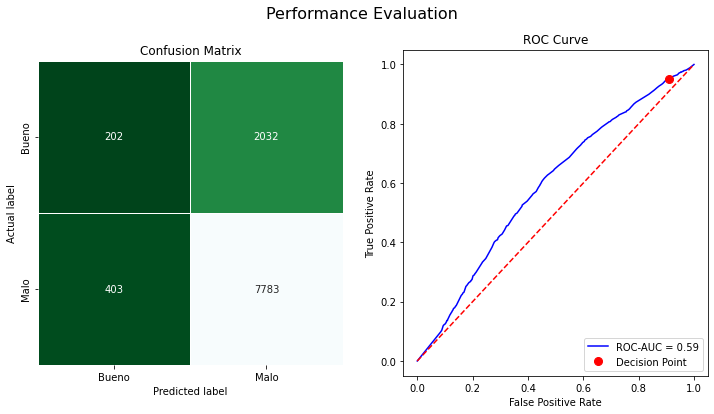

In [33]:
## Obtenemos la evaluación del perfomance con la función creada anteriormente
LABELS = ['Bueno', 'Malo']
tree_perf = performance_evaluation_report(dec_tree, X_woe_test,y_test,labels=LABELS,show_plot=True)

Obtenemos una matriz de confusión con muy pocos valores buenos de que hecho son buenos y con una gran cantidad de valores que son malos dado que son malos. Sin enmbargo se observa una cantidad significativa de valores clasificados como malos dado que son buenos. Además observamos que el AUC nos podría indicar que el modelo de clasificación no es significativo.

En lo que sigue vamos a generar un pipeline con los valores sin valores extremos utilizando una función dada en clase para generar un modelo más robusto de árbol de desición, para ello vamos a cargar nuevamente los datos de la tabla limpia. 

In [34]:
bd = pd.read_csv("C:/Users/Miguel Luna/Desktop/Tabla_limpia.csv")
bd = bd.drop(['Unnamed: 0'], axis=1)

X = bd.copy()
X = X.drop(["_id_","_id2_","fecha_inicio"],axis=1)
y = X.pop('Otorgación_credito')
X

,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,inversion
0,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,0.33522,260.869565,25.854639,56.0,-230.0,0.000000
1,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,0.33334,40.579710,2.872738,62.0,-230.0,0.041039
2,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,0.27318,276.811594,27.434645,125.0,-230.0,77.422135
3,3546.099291,b'1',15.0,70.0,1.0,9.0,160.0,0.32988,640.579710,63.487504,81.0,-230.0,90.539953
4,506.585613,b'0',9.0,50.0,3.0,3.0,154.0,0.35514,217.391304,21.545533,114.0,-230.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34726,0.000000,b'1',1.0,60.0,2.0,9.0,146.0,0.34552,110.144928,9.910945,122.0,-230.0,0.000000
34727,0.000000,b'1',2.0,50.0,2.0,6.0,147.0,0.34318,140.579710,13.932778,95.0,-230.0,0.000000
34728,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0,0.38000,188.405797,9.652399,114.0,-230.0,730.952882
34729,0.000000,b'1',3.0,58.0,2.0,9.0,148.0,0.34000,434.782609,33.323758,124.0,-230.0,24.763419


In [35]:
## Dividimos la muestra en datos de entrenamiento y validación (está en un 20% del total de la muestra)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
## función que remueve valores extremos para las variables continuas. 
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError('''There are missing values in the array! 
                                Please remove them.''')

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)
        
        self.upper_band_ = mean_vec + self.n_std * std_vec
        self.lower_band_ = mean_vec - self.n_std * std_vec
        self.n_features_ = len(self.upper_band_)
        
        return self 
    
    def transform(self, X, y = None):
        X_copy = pd.DataFrame(X.copy())
        
        upper_band = np.repeat(
            self.upper_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        lower_band = np.repeat(
            self.lower_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        
        X_copy[X_copy >= upper_band] = upper_band
        X_copy[X_copy <= lower_band] = lower_band
        
        return X_copy.values

In [38]:
## Definimos las variables categóricas y las continuas dado nuesto análisis de columnas de la tarea 1. 
num_features = list(['comp_interno1','comp_interno3','comp_interno4','comp_mixto1','comp_externo1','comp_externo2','comp_externo3','comp_externo4','inversion'])
cat_features = list(['comp_interno2','categoria1','categoria2','categoria3'])
## Definimos el pipeline y el tratamiento de datos nulos para las variables continuas (mediana) y categóricas (moda).
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', OutlierRemover())])
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])
## Definimos el preprocesados y hacemos la transformación de las variables. 
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')

In [39]:
## Declaramos el modelo de árbol de clasificación.
dec_tree = DecisionTreeClassifier(random_state=40,criterion="entropy",max_depth=10)

In [40]:
## Entrenamos el modelo con el pipeline.
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', dec_tree)])
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   OutlierRemover())]),
                                                  ['comp_interno1',
                                                   'comp_interno3',
                                                   'comp_interno4',
                                                   'comp_mixto1',
                                                   'comp_externo1',
                                                   'comp_externo2',
                                                   'comp_externo3',
                                                   'comp_externo4',
               

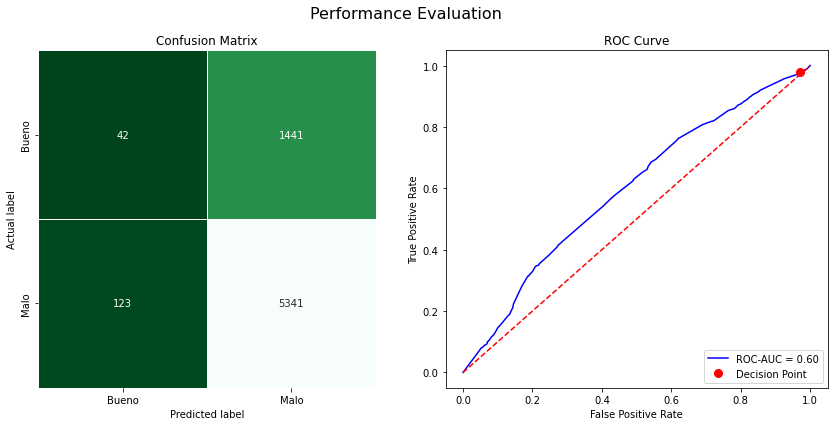

In [41]:
## Obtenemos la evaluación del perfomance del último modelo. 
tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
pred = tree_pipeline.predict_proba(X_test)
auc_test = roc_auc_score(y_test,pred[:,1])

0.5962207482754774

En este modelo observamos un comportamiento muy similar al que se obtuvo con los WOEs en el árbol de desición.

### Gini

In [51]:
gini = auc_test*2-1
print('Gini: \n ',gini)

Gini: 
  0.19244149655095488


### Validación cruzada

In [52]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([0.77019975, 0.77397877, 0.76965989, 0.77433867, 0.77483801])

In [53]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.28970599, 0.29022264, 0.30467081, 0.28624701, 0.25100088]),
 'score_time': array([0.04700685, 0.03836536, 0.04986858, 0.03675222, 0.04735231]),
 'test_accuracy': array([0.77019975, 0.77397877, 0.76965989, 0.77433867, 0.77483801]),
 'test_precision': array([0.78818927, 0.7893368 , 0.787068  , 0.78937593, 0.78767755]),
 'test_recall': array([0.96797072, 0.97208877, 0.96933638, 0.97254005, 0.9771167 ]),
 'test_roc_auc': array([0.59136747, 0.611567  , 0.58320353, 0.60995337, 0.59915297])}

### Kolmogorov-Smirnov

In [54]:
p = tree_pipeline.predict(X_train)
ks_2samp(p,y_train)

KstestResult(statistic=0.18780593147135044, pvalue=0.0)

In [55]:
## Obtiene los mejores parámetros para el árbol
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}
classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['comp_interno1',
                                                                          'comp_interno3',
                                                                          'comp_interno4',
                                                                      

In [56]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2}
Recall (Training set): 1.0000
Recall (Test set): 1.0000


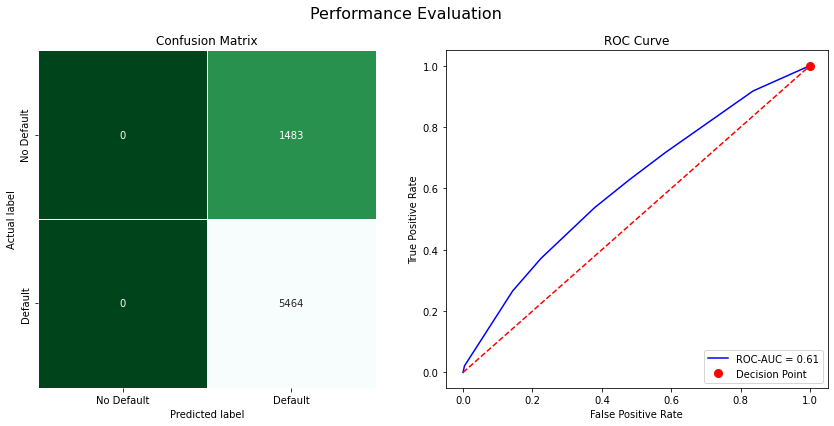

In [57]:
## Perfomance de los mejores parámetros encontrados con GridSearchCV
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve,  accuracy_score

In [59]:
train_scores, val_scores, leaves = {}, {}, {}
for max_depth in range(1, 26):
    print(max_depth, end=' ', flush=True)
    reg_tree = DecisionTreeClassifier(criterion='entropy',
                                          max_depth=max_depth,
                                          min_samples_leaf=2,
                                          random_state=42)
    tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])
    train_scores[max_depth], val_scores[max_depth], leaves[max_depth] = [],[], []
    for train_idx, test_idx in k_fold.split(X_train,y_train):
        X_t, y_t,  = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_te, y_te = X_train.iloc[test_idx], y_train.iloc[test_idx]
        tree_pipeline.fit(X_t, y_t)
        train_pred = tree_pipeline.predict_proba(X=X_t)[:, 1]
        train_score = roc_auc_score(y_score=train_pred, y_true=y_t)
        #print(train_score)
        train_scores[max_depth].append(train_score)

        test_pred = tree_pipeline.predict_proba(X=X_te)[:, 1]
        val_score = roc_auc_score(y_score=test_pred, y_true=y_te)
        val_scores[max_depth].append(val_score)  
        #print(val_score)
        leaves[max_depth].append(max_depth)
        #reg_tree.fit(X=X_t, y=y_t)

        
        #train_scores[max_depth].append(train_score)

        #test_pred = reg_tree.predict(X=X_test)
        #val_score = np.sqrt(mean_squared_error(
        #    y_pred=test_pred, y_true=y_test))
        #val_scores[max_depth].append(val_score)
        #leaves[max_depth].append(get_leaves_count(reg_tree))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

In [60]:
clf_train_scores = pd.DataFrame(train_scores)
clf_valid_scores = pd.DataFrame(val_scores)
bd_leaves = pd.DataFrame(leaves)

In [61]:
clf_train_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.586561,0.618042,0.632127,0.639197,0.649953,0.659948,0.675068,0.692084,0.712869,0.736002,...,0.869267,0.887428,0.902605,0.916719,0.928692,0.939778,0.949107,0.958482,0.965602,0.970844
1,0.586574,0.615476,0.630805,0.637778,0.645812,0.655524,0.668789,0.682287,0.699058,0.715630,...,0.852376,0.873191,0.893112,0.912981,0.927349,0.940144,0.952607,0.960401,0.967529,0.973669
2,0.584536,0.616434,0.632675,0.641572,0.653093,0.662971,0.674922,0.690495,0.706059,0.723350,...,0.839403,0.856929,0.874389,0.890655,0.904908,0.920391,0.932306,0.942296,0.950696,0.960290
3,0.588289,0.617799,0.632153,0.639663,0.648588,0.657743,0.670892,0.685682,0.704492,0.725668,...,0.852503,0.870739,0.890753,0.906557,0.922721,0.936108,0.948230,0.958698,0.966113,0.972506
4,0.587503,0.617705,0.630262,0.638742,0.648691,0.659066,0.670040,0.685364,0.699048,0.716013,...,0.843108,0.863750,0.882214,0.900216,0.913840,0.926511,0.938356,0.948188,0.957070,0.964977


In [62]:
clf_valid_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.581921,0.612583,0.625716,0.622706,0.625643,0.621539,0.608743,0.605079,0.596522,0.588146,...,0.560961,0.560872,0.551982,0.547500,0.542004,0.544380,0.545706,0.541110,0.544181,0.536923
1,0.589743,0.616472,0.629896,0.626850,0.631170,0.632075,0.627635,0.621453,0.615874,0.610492,...,0.563129,0.558195,0.555320,0.550485,0.552421,0.549743,0.549089,0.546992,0.547508,0.542378
2,0.590019,0.612627,0.620853,0.617071,0.622898,0.620499,0.613198,0.603181,0.586446,0.582328,...,0.548586,0.557288,0.545205,0.542558,0.541059,0.540463,0.541813,0.533965,0.525969,0.526062
3,0.582891,0.613578,0.627813,0.629870,0.628787,0.629619,0.625179,0.622279,0.618043,0.608041,...,0.582722,0.584443,0.567555,0.561618,0.559449,0.560279,0.553308,0.552962,0.548621,0.535269
4,0.586029,0.615100,0.630981,0.633473,0.627971,0.622994,0.619812,0.609946,0.610614,0.599044,...,0.574101,0.563039,0.563047,0.559132,0.555143,0.552853,0.553664,0.549928,0.543502,0.534390


In [63]:
roc_entrenamiento=[]
for c in clf_train_scores.columns:
    promedio_roc=mean(clf_train_scores[c])
    roc_entrenamiento.append(promedio_roc)
    
roc_validacion=[]
for c in clf_valid_scores.columns:
    promedio_roc=mean(clf_valid_scores[c])
    roc_validacion.append(promedio_roc)

prof=[]
for c in bd_leaves.columns:
    id_=mean(bd_leaves[c])
    prof.append(id_)

In [64]:
roc_entrenamiento

[0.5866927939053606,
 0.6170909984469887,
 0.6316045046045883,
 0.6393905758234968,
 0.6492273569532566,
 0.6590503996991793,
 0.6719423283813644,
 0.6871824000530111,
 0.7043052837613162,
 0.723332568677401,
 0.7438438380918706,
 0.7662204723248218,
 0.788522993561504,
 0.8103382413356452,
 0.8309624292410867,
 0.8513314635902087,
 0.8704075718127932,
 0.8886143372537196,
 0.9054254193330419,
 0.9195020829616786,
 0.9325864280163063,
 0.944121347449393,
 0.9536131154210509,
 0.9614021361930274,
 0.968457020100891]

In [65]:
roc_validacion

[0.5861205981303728,
 0.6140717921254781,
 0.6270516504683387,
 0.6259939529117787,
 0.6272938499541579,
 0.6253452058124669,
 0.6189133695810612,
 0.6123874677016735,
 0.6054997080040372,
 0.5976101428715737,
 0.5940796459386293,
 0.5884841743980618,
 0.5797226061500764,
 0.5768797071589172,
 0.5718690214492606,
 0.5658996459343447,
 0.5647673052129689,
 0.556621703262439,
 0.5522587911408725,
 0.5500152539445058,
 0.5495435160465434,
 0.5487160423978235,
 0.5449915928901307,
 0.5419561859820716,
 0.5350045508423379]

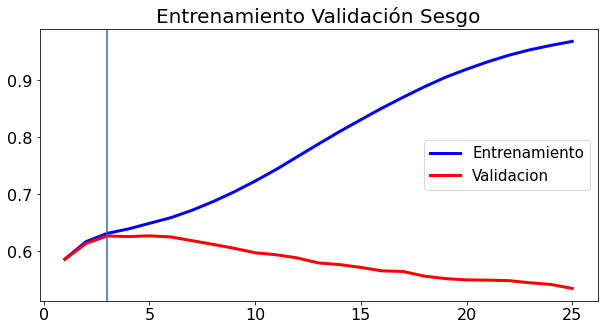

In [66]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Entrenamiento Validación Sesgo",fontsize=20)
ax.plot(prof,roc_entrenamiento,color="blue",linewidth=3,label="Entrenamiento")
ax.plot(prof,roc_validacion,color="red",linewidth=3,label="Validacion")
#gca().yaxis.set_major_formatter("{x:,.0%}")
xticks(fontsize=16)
yticks(fontsize=16)
axvline(3)
legend(fontsize=15)
show()

# Selección del mejor modelo para los datos

Observamos que el mejor modelo, anque aun mejorable, es el de regresión logística dado los porcentajes de ROC-AUC y que las estadísiticas de Gini y Kolmogorov-Smirnov son más altas, por lo que para estos datos con estos dos modelos de clasificación obtiene mejores resultados con la regresión logística.

## Puntos optimos de desición

In [67]:
from scikitplot import metrics, estimators

In [68]:
train, test = train_test_split(X2, test_size = 0.30, random_state = 100) 
X_woe_train=train.iloc[:,17:]
y_train=train.iloc[:,16]
X_woe_test=test.iloc[:,17:]
y_test = test.iloc[:,16]
f_train=X_woe_train.drop(['woe_comp_interno3','woe_comp_externo1','woe_comp_externo4'],axis=1)
fX_woe_test=X_woe_test.drop(['woe_comp_interno3','woe_comp_externo1','woe_comp_externo4'],axis=1)

In [69]:
#train.head()

In [70]:
model=LogisticRegression(C=100, penalty='l2')
clf=model.fit(f_train,y_train)

In [71]:
y_pred=clf.predict(fX_woe_test)
y_pred1=clf.predict_proba(fX_woe_test)

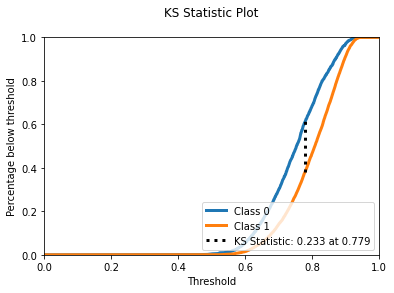

In [72]:
metrics.plot_ks_statistic(y_test, y_pred1, title= 'KS Statistic Plot\n')
plt.show()

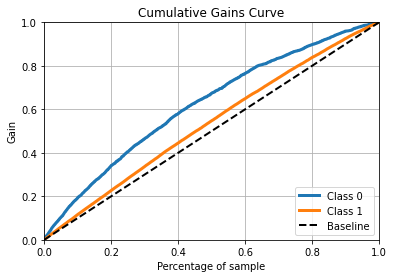

In [73]:
metrics.plot_cumulative_gain(y_test, y_pred1)
plt.show()

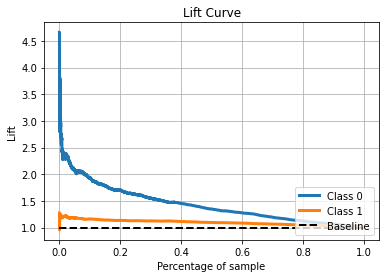

In [74]:
metrics.plot_lift_curve(y_test, y_pred1)
plt.show()

L:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

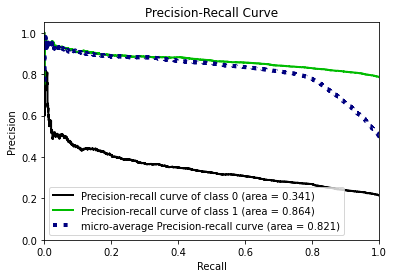

In [75]:
metrics.plot_precision_recall_curve(y_test,y_pred1)

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

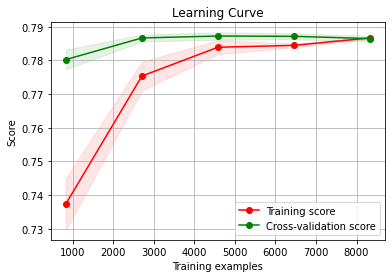

In [76]:
estimators.plot_learning_curve(model, X_woe_test, y_test)